In [1]:
#!pip install sodapy
#!pip install pandas

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8hqm-7fdt", limit=200000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [3]:
results_df.columns

Index(['id', 'entidad_que_realiza_el_registro_de_la_desaparicion',
       'estado_de_la_desaparicion', 'clasificacion_de_la_desaparicion',
       'sexo_del_desaparecido', 'grupo_mayor_y_menor_de_edad_del_desaparecido',
       'grupo_de_edad_quinquenal_del_desaparecido',
       'grupo_de_edad_judicial_del_desaparecido',
       'ciclo_vital_del_desaparecido', 'estado_civil_del_desaparecido',
       'escolaridad_del_desaparecido', 'identidad_de_genero_del_desaparecido',
       'orientacion_sexual_del_desaparecido', 'transgenero',
       'pueblo_indigena_del_desaparecido',
       'pertenencia_etnica_del_desaparecido', 'pertenencia_grupal',
       'pais_de_nacimiento_del_desaparecido', 'fecha_de_la_desaparicion',
       'a_o_de_la_desaparicion', 'mes_de_la_desaparicion',
       'dia_de_la_desaparicion', 'pais_donde_ocurre_la_desaparicion',
       'codigo_dane_departamento',
       'departamento_donde_ocurre_la_desaparicion_dane',
       'codigo_dane_municipio', 'municipio_donde_ocurre_la_de

In [10]:
results_df['fecha_de_la_desaparicion'] = pd.to_datetime(results_df['fecha_de_la_desaparicion'], errors = 'coerce')
results_df['year_month'] = results_df['fecha_de_la_desaparicion'].dt.to_period('M')
des_genero = results_df[['sexo_del_desaparecido','year_month']]

In [11]:
# 3. Agrupar por año-mes y por género, contando el número de desaparecidos
desaparecidos_por_mes_genero = (
    des_genero
    .groupby(['year_month', 'sexo_del_desaparecido'])
    .size()
    .unstack(fill_value=0)  # Para que las celdas sin datos se rellenen con 0
)

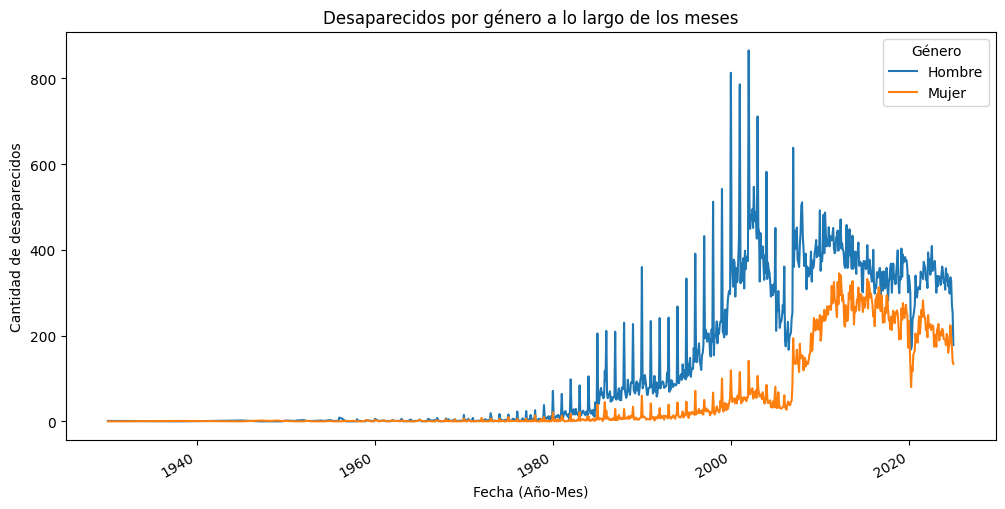

In [12]:
import matplotlib.pyplot as plt

# Convertir índice (period) a tipo timestamp (fecha)
desaparecidos_por_mes_genero.index = desaparecidos_por_mes_genero.index.to_timestamp()

# Crear gráfica (por ejemplo, de líneas)
desaparecidos_por_mes_genero.plot(figsize=(12,6))
plt.title('Desaparecidos por género a lo largo de los meses')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Cantidad de desaparecidos')
plt.legend(title='Género')
plt.show()

In [2]:
results_df.head()

,id,entidad_que_realiza_el_registro_de_la_desaparicion,estado_de_la_desaparicion,clasificacion_de_la_desaparicion,sexo_del_desaparecido,grupo_mayor_y_menor_de_edad_del_desaparecido,grupo_de_edad_quinquenal_del_desaparecido,grupo_de_edad_judicial_del_desaparecido,ciclo_vital_del_desaparecido,estado_civil_del_desaparecido,...,mes_de_la_desaparicion,dia_de_la_desaparicion,pais_donde_ocurre_la_desaparicion,codigo_dane_departamento,departamento_donde_ocurre_la_desaparicion_dane,codigo_dane_municipio,municipio_donde_ocurre_la_desaparicion_dane,zona_donde_ocurre_la_desaparicion,contexto,localidad_donde_ocurre_la_desaparicion
0,1,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,Sin información,Hombre,b) Mayores de Edad (>18 años),(20 a 24),(20 a 24),(18 a 28) Juventud,Soltero (a),...,diciembre,viernes,Colombia,11,Bogotá D.C.,11001,Bogotá D.C.,Cabecera municipal,Desaparición,Sin información
1,2,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,Sin información,Hombre,b) Mayores de Edad (>18 años),(20 a 24),(20 a 24),(18 a 28) Juventud,Soltero (a),...,diciembre,martes,Colombia,11,Bogotá D.C.,11001,Bogotá D.C.,Cabecera municipal,Desaparición,Kennedy
2,3,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,Sin información,Mujer,a) Menores de Edad (<18 años),(10 a 14),(10 a 13),(12 a 17) Adolescencia,Soltero (a),...,diciembre,viernes,Colombia,11,Bogotá D.C.,11001,Bogotá D.C.,Cabecera municipal,Desaparición,Engativa
3,4,Instituto Nacional de Medicina Legal y Ciencia...,Aparecio vivo,Sin información,Mujer,a) Menores de Edad (<18 años),(15 a 17),(14 a 17),(12 a 17) Adolescencia,Soltero (a),...,diciembre,viernes,Colombia,11,Bogotá D.C.,11001,Bogotá D.C.,Cabecera municipal,Desaparición,Kennedy
4,5,Instituto Nacional de Medicina Legal y Ciencia...,Aparecio vivo,Sin información,Hombre,b) Mayores de Edad (>18 años),(70 a 74),(70 a 74),(Más de 60) Adulto Mayor,Unión Libre,...,diciembre,domingo,Colombia,11,Bogotá D.C.,11001,Bogotá D.C.,Cabecera municipal,Desaparición,Sin información


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Datos de ejemplo: una onda sinusoidal
# (Podrías reemplazarlo con tus datos reales de una serie temporal)
x_data = np.linspace(0, 4*np.pi, 200)
y_data = np.sin(x_data)

# Crear la figura y los ejes
fig, ax = plt.subplots()
ax.set_xlim(0, 4*np.pi)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Valor')
ax.set_title('Animación de Serie Temporal')

# Crear una línea vacía que se actualizará en cada frame
line, = ax.plot([], [], 'r-')

# Función de inicialización: define el estado inicial de la animación
def init():
    line.set_data([], [])
    return line,

# Función que se llama en cada frame para actualizar la animación
def update(frame):
    # frame irá de 0 hasta len(x_data)-1
    x = x_data[:frame]
    y = y_data[:frame]
    line.set_data(x, y)
    return line,

# Crear la animación
anim = FuncAnimation(
    fig,       # Figura sobre la que se va a animar
    update,    # Función que actualiza la animación en cada frame
    frames=len(x_data),  # Cantidad de frames (un frame por punto)
    init_func=init,      # Función de inicialización
    blit=True,           # Optimización para animaciones
    interval=50          # Intervalo entre frames en milisegundos
)

plt.show()
anim.save('animacion.gif', writer='ffmpeg', fps=30)